In [ ]:
from google.colab import files
import numpy as np
from numpy.random import randint, rand
import pandas as pd
from scipy.signal import savgol_filter
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
                                                                ##### Plot #####
def plot_image(y,n):
  plt.figure(figsize=(20,1))
  plt.scatter(hnum[0],y)
  plt.plot(hnum[0],y)     
  plt.axis('off')
  plt.title(f"{n}")
  plt.show()

In [ ]:
files.upload()

In [ ]:
                           ##### dataset_full including inputs and outputs #####
xy=pd.read_csv("dataset_full60.csv")
## Split into x,y ##
y=np.array([xy["efficiency"],xy["stress"],xy["deformation"]]).T
X=xy.drop(columns=["efficiency","stress","deformation"])
## float64 --> 32 ##
X=np.array(X,dtype="float32")
y=y.astype(np.float32)
## Scale the y ##
scaler= MinMaxScaler()
scaled_y= scaler.fit_transform(y)
Y=np.array(scaled_y)

In [ ]:
                                                   ### RandomForestRegressor ###
cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=2)
forest=RandomForestRegressor()
forest_cross=cross_val_score(forest,X,Y,scoring="neg_mean_squared_error", cv=cv, n_jobs=-1)
final_forest=forest.fit(X,Y)

In [ ]:
# Upload x_dataset, y_dataset
files.upload()

In [ ]:
                            ##### dataset including only inputs (features) #####
v= pd.read_csv("y_dataset.csv")
h= pd.read_csv("x_dataset.csv")
vnum=v.to_numpy(dtype="float32")
hnum=h.to_numpy(dtype="float32")
## Split into train and test ##
train,test = train_test_split(vnum,test_size=0.2,random_state=42)

In [ ]:
## PCA dataset ##
d=10
pca=PCA(n_components=d)
reduced=pca.fit_transform(train)

def pca_inverse(reduced):
  recovered= pca.inverse_transform(reduced)
  return recovered

In [ ]:
                                                  ##### Objective function #####
def predictions(decoded):
    pre=final_forest.predict(decoded)            
    ## Invert scaled to real data ##
    prediction=scaler.inverse_transform(pre) 
    return prediction

In [ ]:
                                                     ##### Decode function #####
def decode(individual):
    return pca_inverse(individual)

In [ ]:
                                                    ##### Fitness function #####
def fitness(p, efficiency_t):
  efficiency= predictions(decode(p))[0,0]
  fitness_score= (efficiency_t - efficiency) / efficiency_t
  return fitness_score

In [ ]:
																													##### tournament (Selection) #####
def selection(pop,efficiency_t,k=5):
		# first random selection
		selection_ix = randint(len(pop))
		for ix in randint(0, len(pop), k-1):
				p1=np.array(pop[selection_ix]).reshape(1,-1)
				fitnessscore1=fitness(p1, efficiency_t)
				p2=np.array(pop[ix]).reshape(1,-1)
				fitnessscore2=fitness(p2, efficiency_t)
				# check if better (e.g. perform a tournament)
				if fitnessscore2 <= fitnessscore1:
						selection_ix = ix
		return pop[selection_ix]

In [ ]:
                                                          ##### Population function #####
## random dataset ##
def random(n_pop,codings_size):
  pop=[]
  noise=tf.random.normal(shape=[n_pop,codings_size])
  pop=np.array(noise)
  pop=pop.tolist()
  return pop

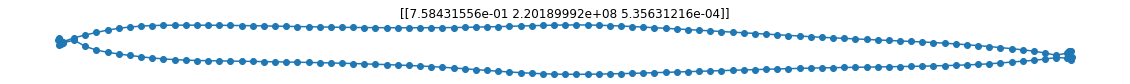

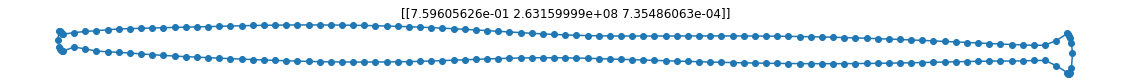

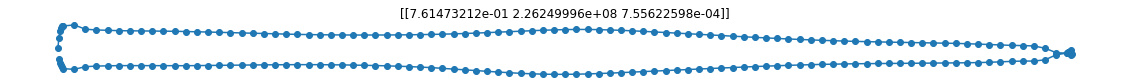

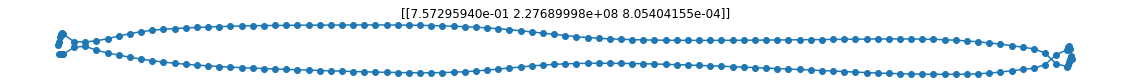

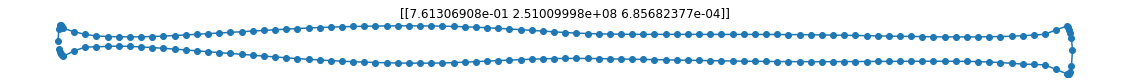

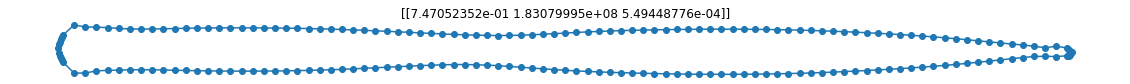

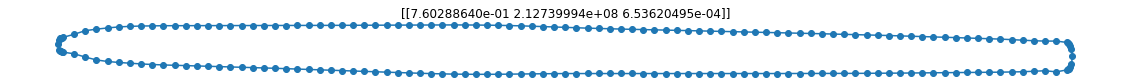

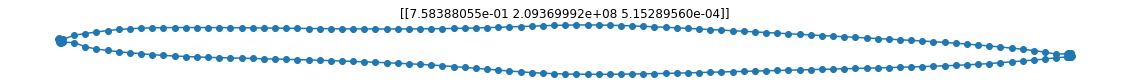

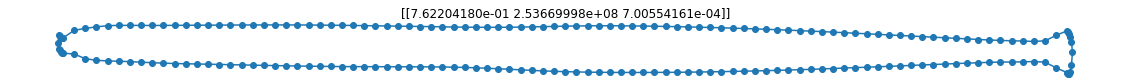

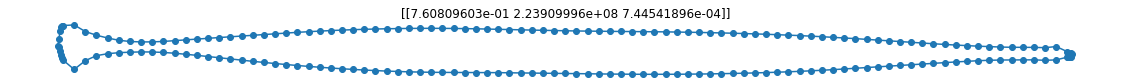

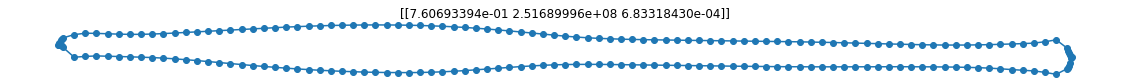

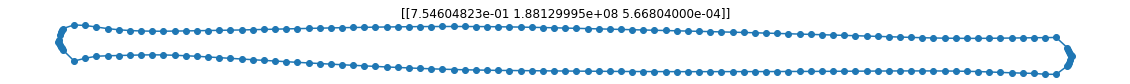

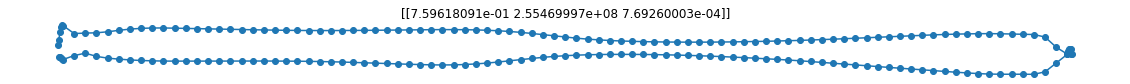

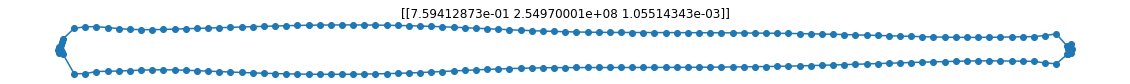

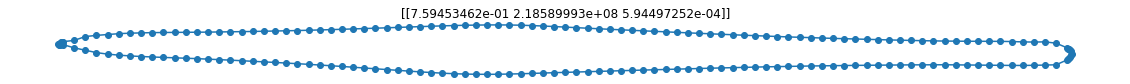

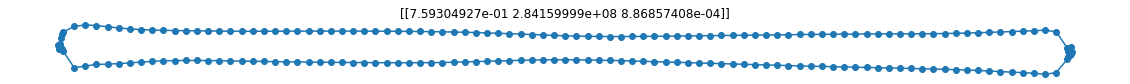

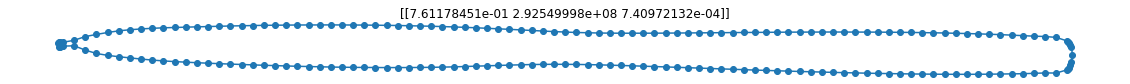

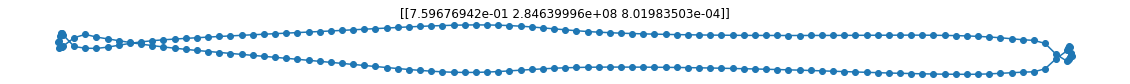

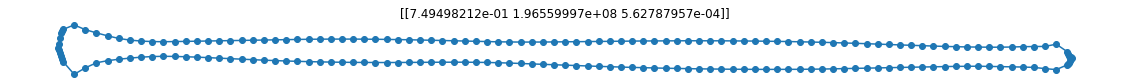

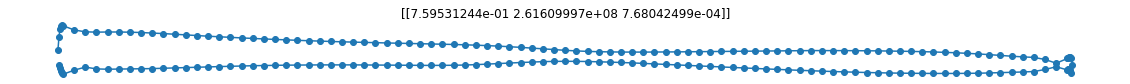

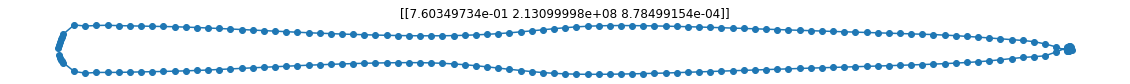

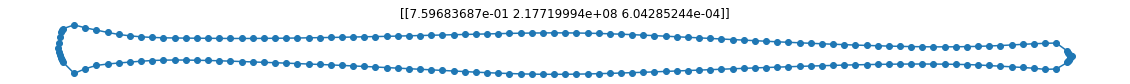

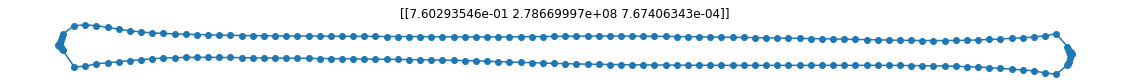

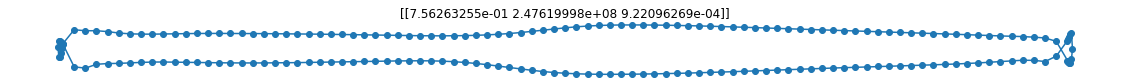

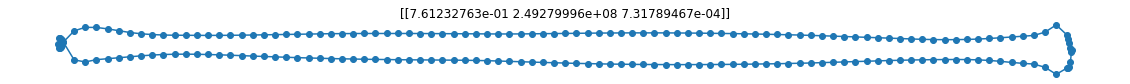

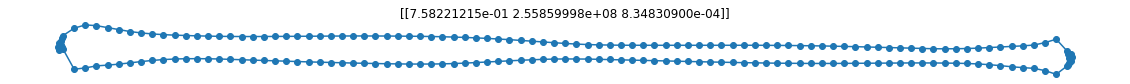

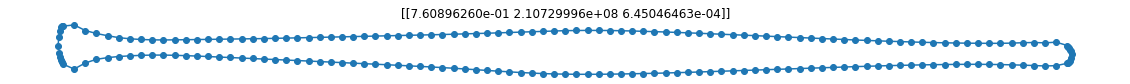

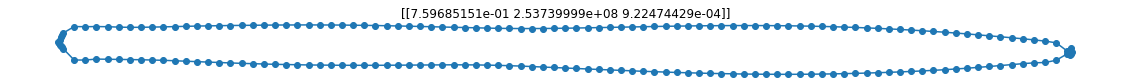

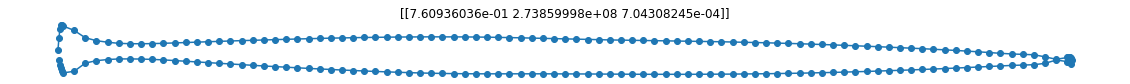

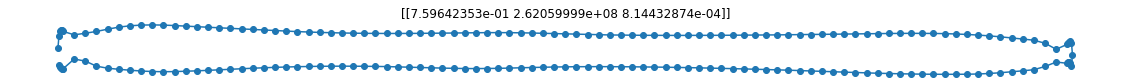

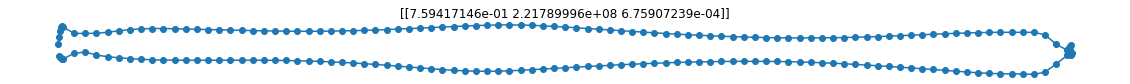

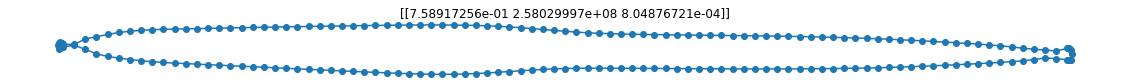

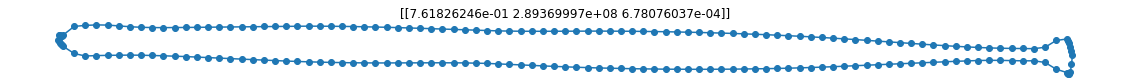

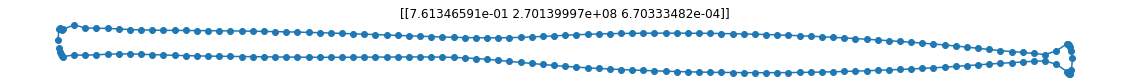

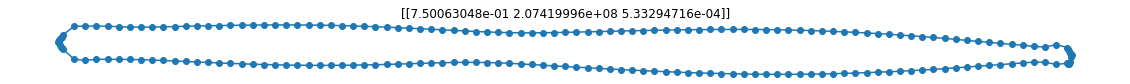

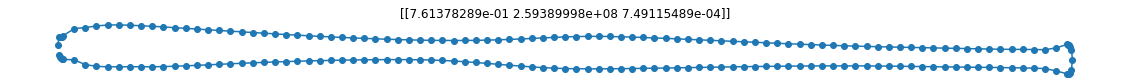

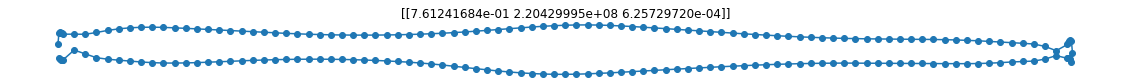

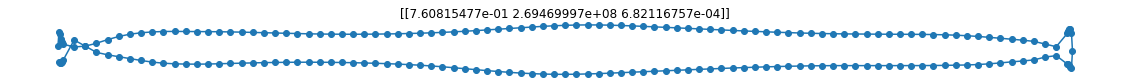

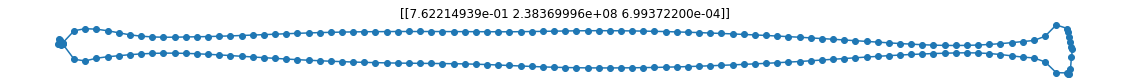

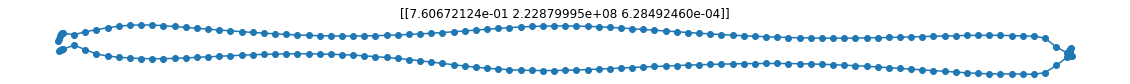

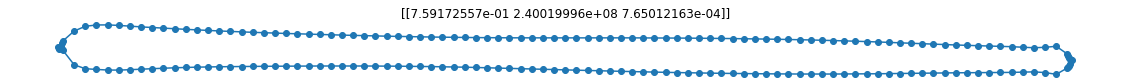

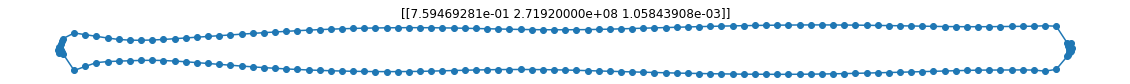

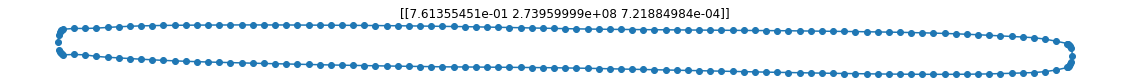

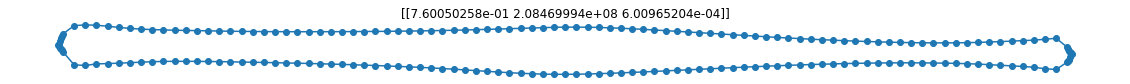

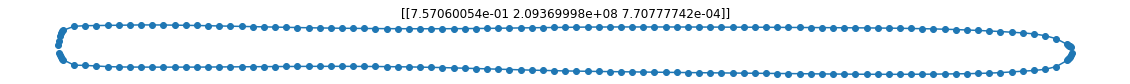

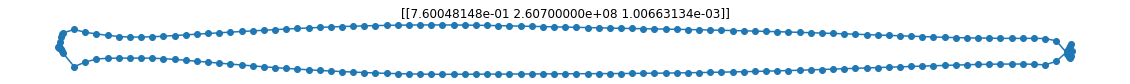

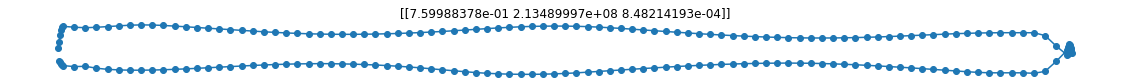

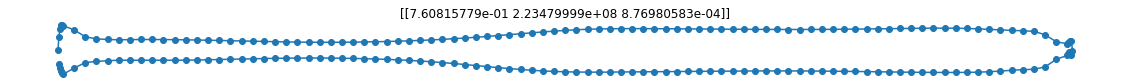

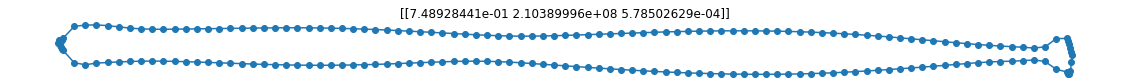

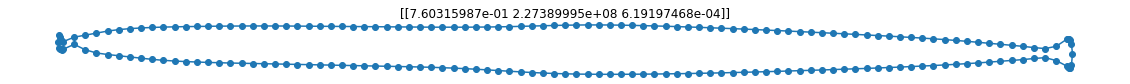

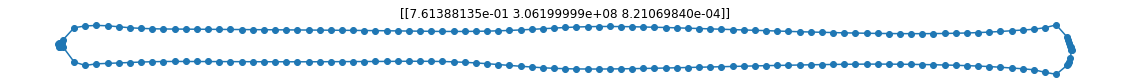

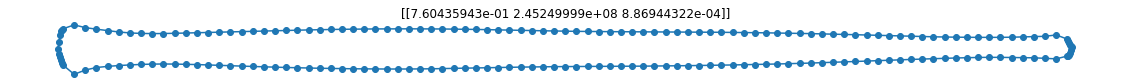

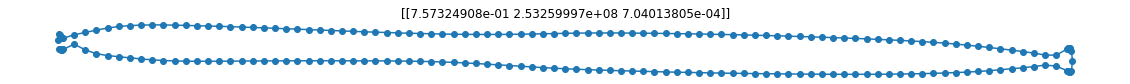

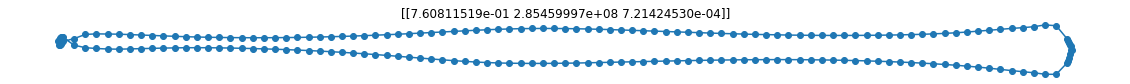

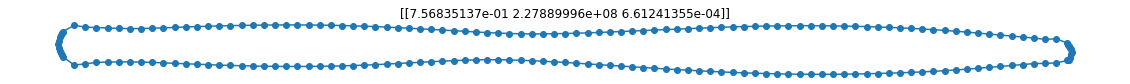

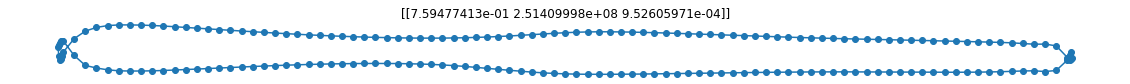

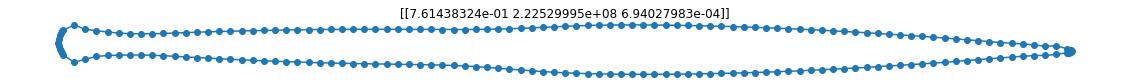

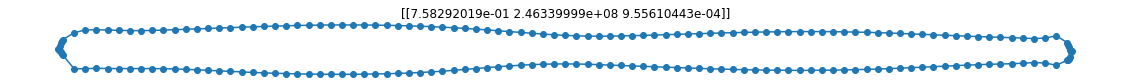

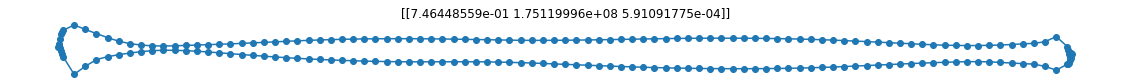

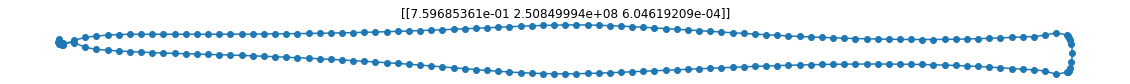

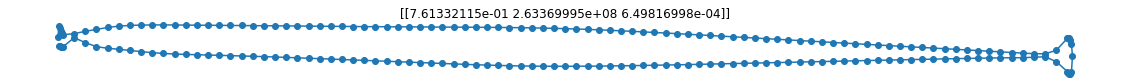

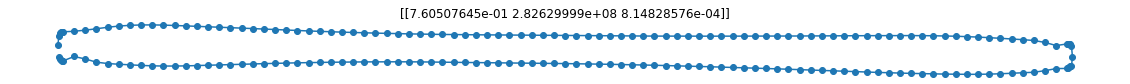

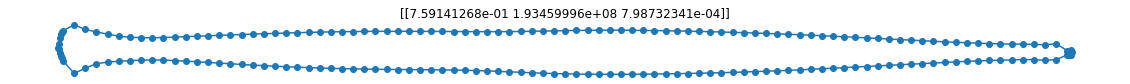

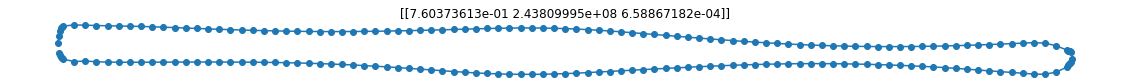

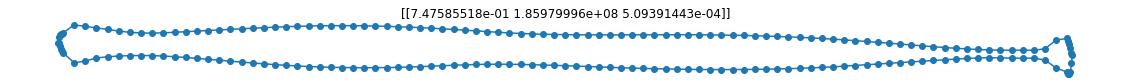

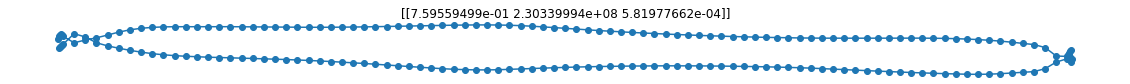

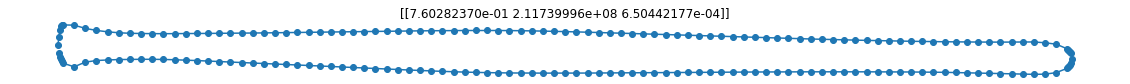

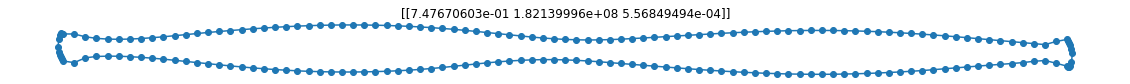

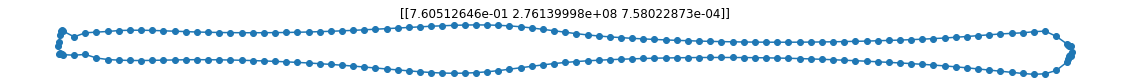

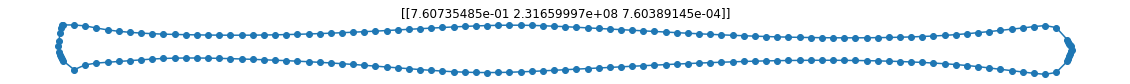

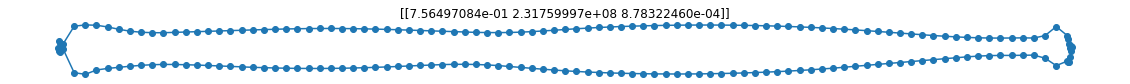

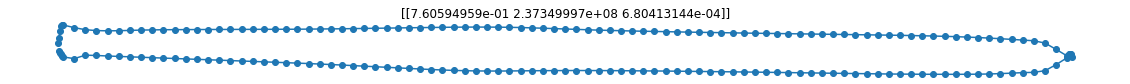

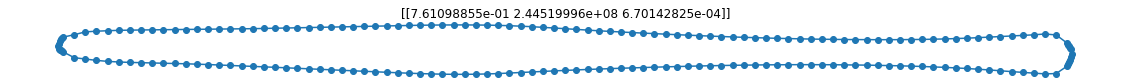

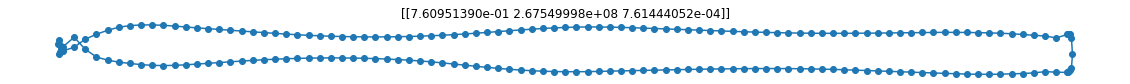

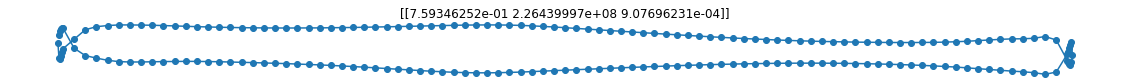

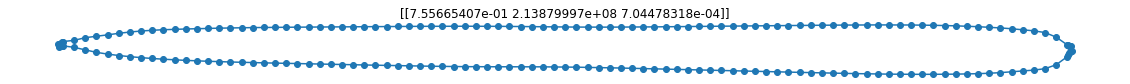

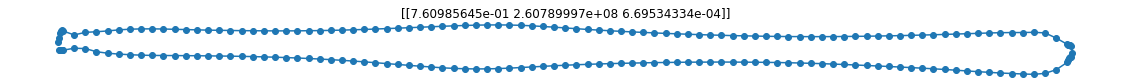

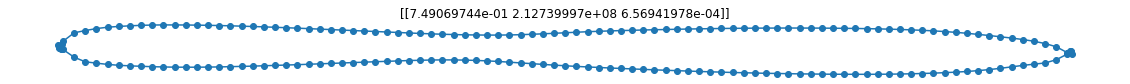

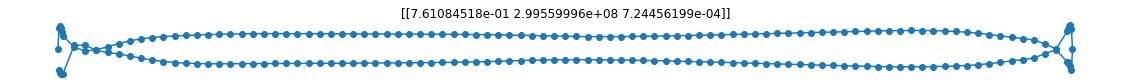

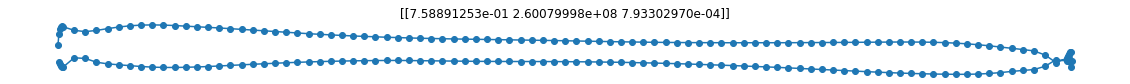

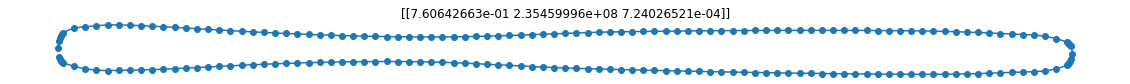

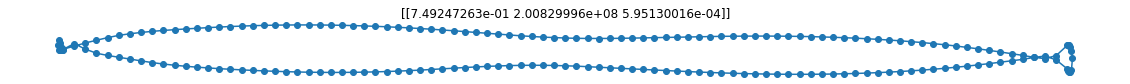

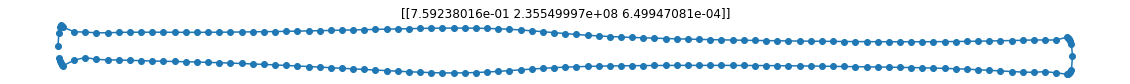

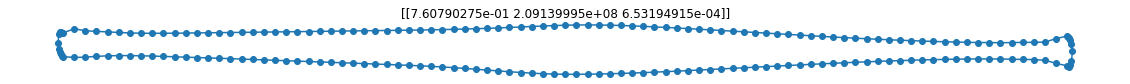

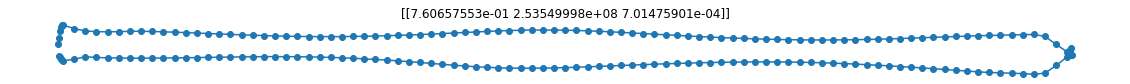

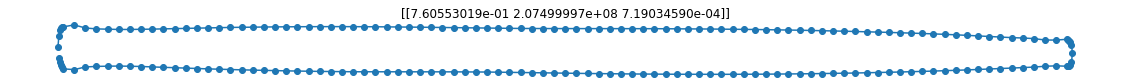

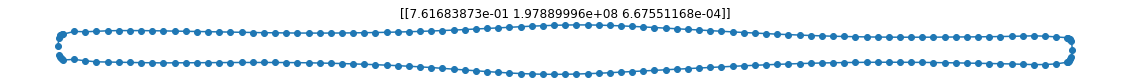

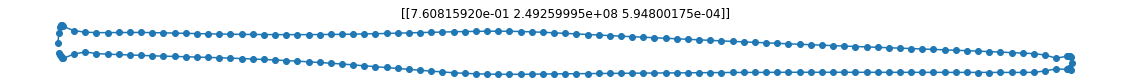

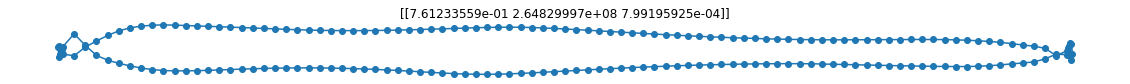

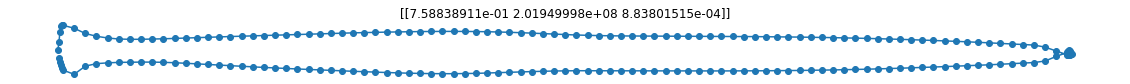

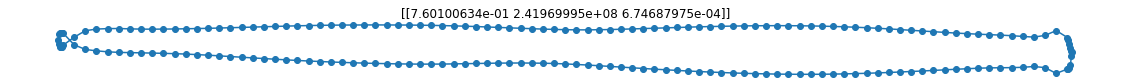

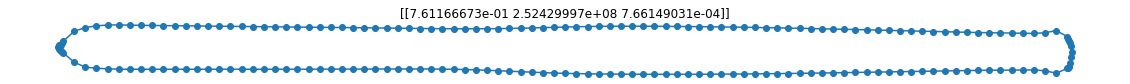

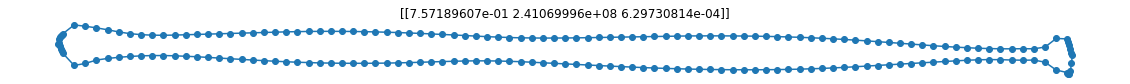

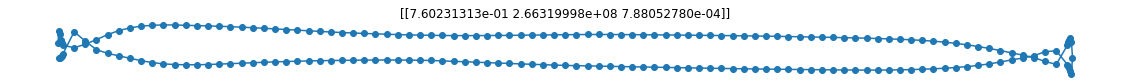

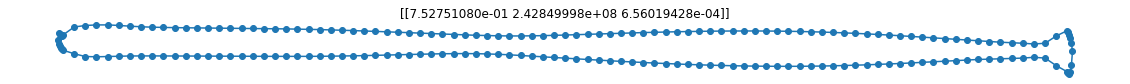

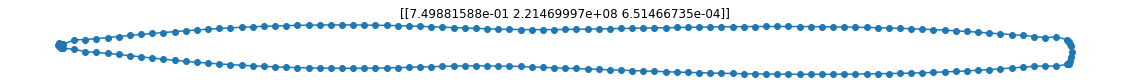

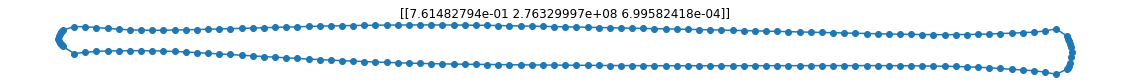

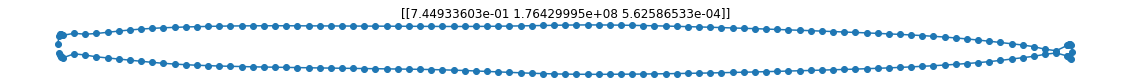

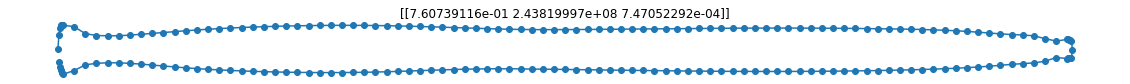

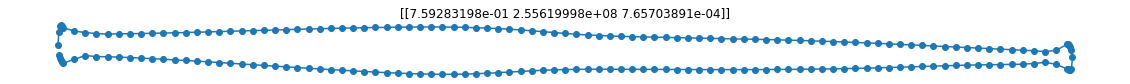

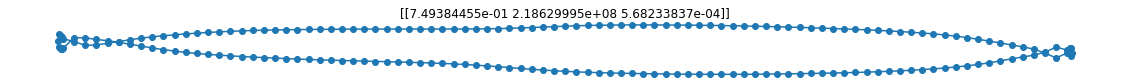

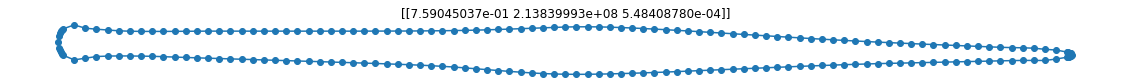

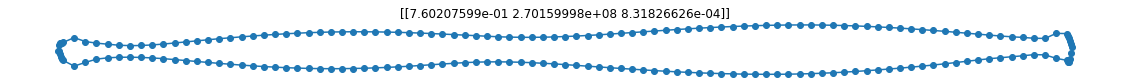

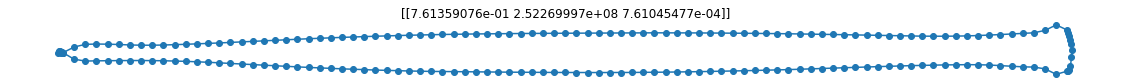

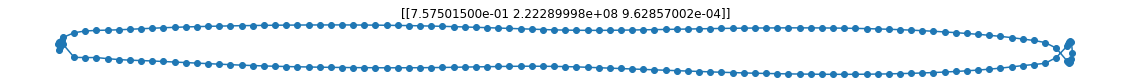

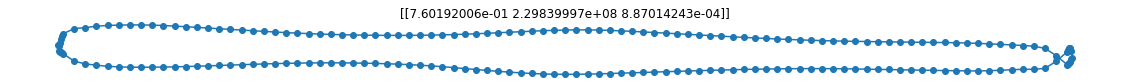

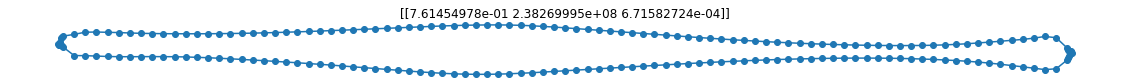

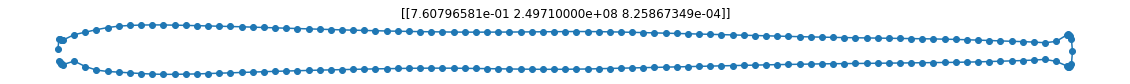

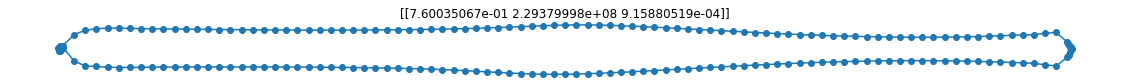

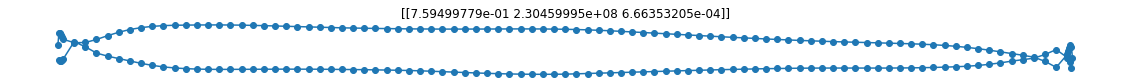

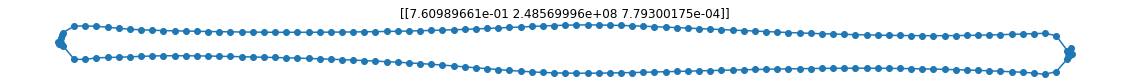

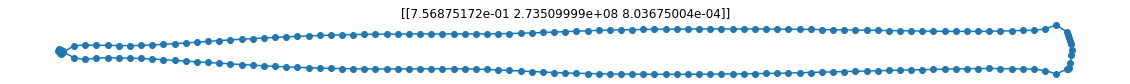

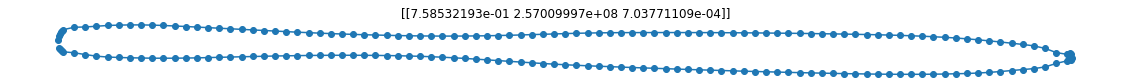

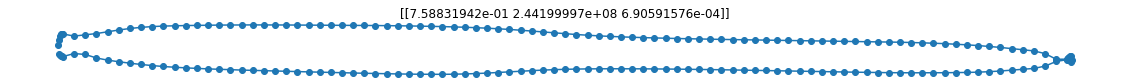

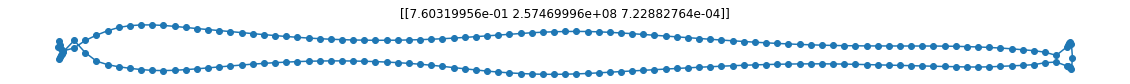

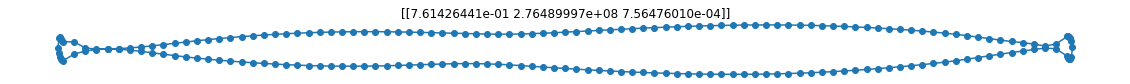

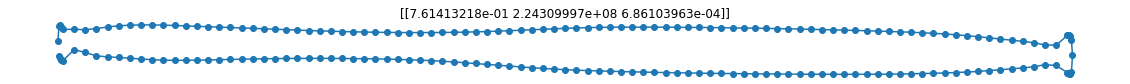

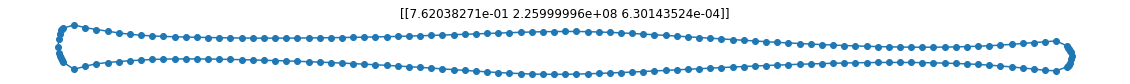

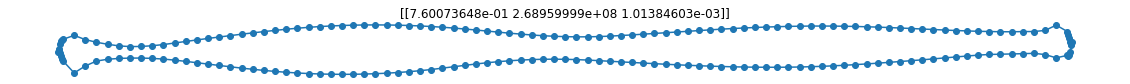

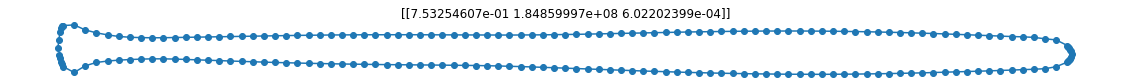

gen=  0
best0=  [[ 1.23646402 -1.06540442  0.2632958  -0.12486087  0.06494782  0.70096081
  -0.04297445  1.48681355  0.74805033 -0.24028702]] 
 best_prediction0=  [0.7590450371563288, 213839992.93997088, 0.00054840878019621]


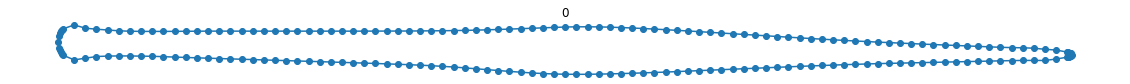

gen=  1
best1=  [[2.90363944 2.75803792 1.45585796 1.29717934 1.26843488 0.1670188
  0.58999425 0.55741996 0.3630141  0.70399791]] 
 best_prediction1=  [0.7440515466206044, 174139994.5735578, 0.0004804741119469819]


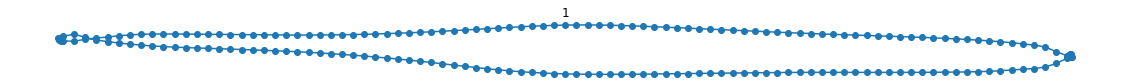

gen=  2
best2=  [[ 0.51209587  0.11506119  1.21942782  0.12467164  1.09004259  0.48070365
  -0.56630838  1.03564487 -0.17409341 -0.49077281]] 
 best_prediction2=  [0.7456329136464307, 170429994.284589, 0.0004918432626637542]


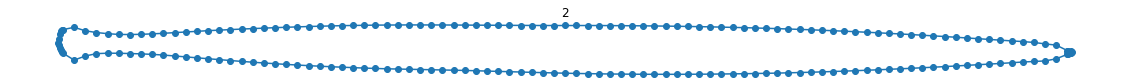

gen=  3
best3=  [[ 0.48790413  0.11506119  1.79852319  0.36334592 -0.04741855  0.40849668
  -0.21474497  1.65574217  0.35653812  0.39030436]] 
 best_prediction3=  [0.7465261060499688, 172049994.6836928, 0.0004876434819522627]


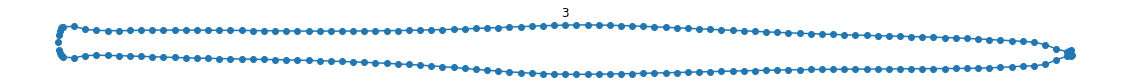

gen=  4
best4=  [[ 0.85996866 -0.68137002  1.11014477  0.48533565 -0.39243683  0.39702535
  -0.81832808  1.93358731  0.18632288  0.3490299 ]] 
 best_prediction4=  [0.7516456008733797, 194409994.66161463, 0.0005253807704950854]


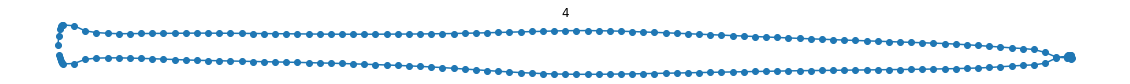

gen=  5
best5=  [[ 1.71948791  0.04891688  2.01749933 -0.03994081  1.39243683  0.39702535
  -0.81832808  1.0338738   0.09476957  1.29339367]] 
 best_prediction5=  [0.7465309514166549, 173359994.75868303, 0.0005022284781479901]


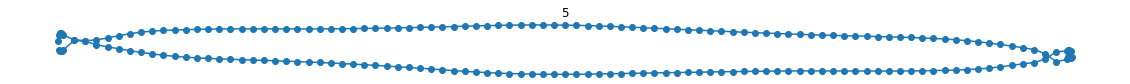

gen=  6
best6=  [[ 0.52411336  0.03201622  2.12618482  0.42270055  0.02616965  1.2630583
  -0.28281787  0.44258004  0.6369859   0.29600209]] 
 best_prediction6=  [0.7472999465636225, 176089995.0681442, 0.0005212779013097012]


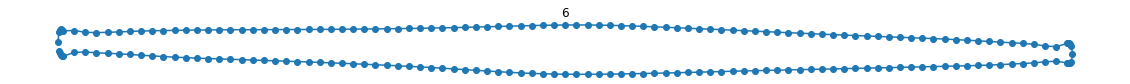

gen=  7
best7=  [[ 0.64480287  0.48797283  2.12618482  0.57729945  1.09004259 -0.04544103
   0.41000575  0.44258004  0.6369859   0.29600209]] 
 best_prediction7=  [0.7435978149216852, 172919994.04416776, 0.0004808802431016023]


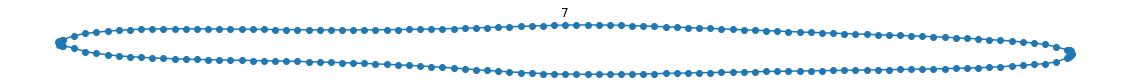

gen=  8
best8=  [[ 1.7646572   0.48797283  1.21942782  0.87532836 -0.09004259  0.48070365
  -0.0100656   1.05489301  1.10308899  0.20091537]] 
 best_prediction8=  [0.7478856785717253, 184759993.95602202, 0.00048139411323130644]


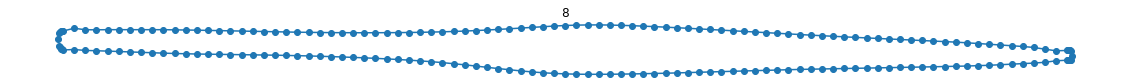

gen=  9
best9=  [[ 0.14003134  0.96798378  1.74313605  1.50490552  1.39243683  0.39702535
  -0.81832808  0.44258004  0.3630141   0.29600209]] 
 best_prediction9=  [0.7455381231662188, 190189994.95618692, 0.0005330214577244782]


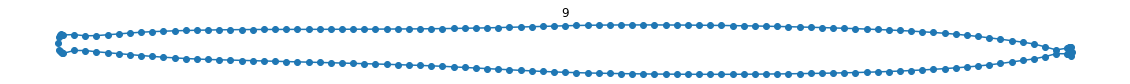

gen=  10
best10=  [[ 1.7646572   0.03201622  2.12618482  0.42270055 -0.09004259  0.51929635
   0.58999425  1.05489301  1.10308899  0.20091537]] 
 best_prediction10=  [0.7467313282501167, 170689993.91651273, 0.000488382162548827]


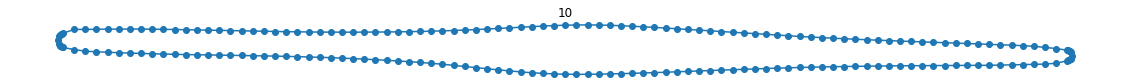

gen=  11
best11=  [[ 0.47588664  0.96798378  2.12618482  0.42270055  0.95049778 -0.04544103
   0.58999425  0.44258004  0.6369859   0.29600209]] 
 best_prediction11=  [0.7437365762262099, 170039993.80271184, 0.00048156594987648117]


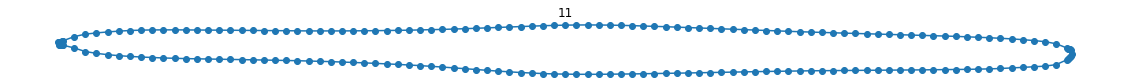

gen=  12
best12=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction12=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


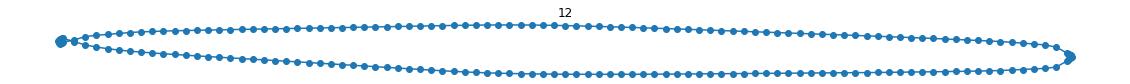

gen=  13
best13=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction13=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


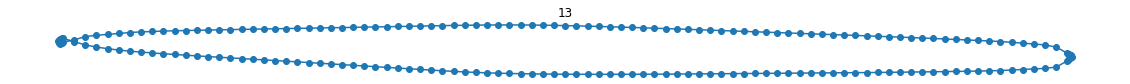

gen=  14
best14=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction14=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


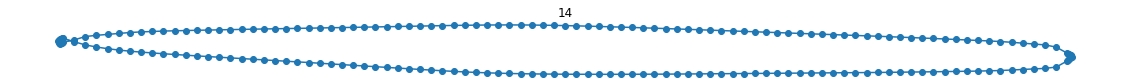

gen=  15
best15=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction15=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


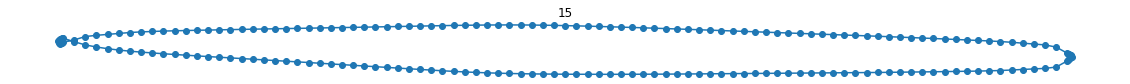

gen=  16
best16=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction16=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


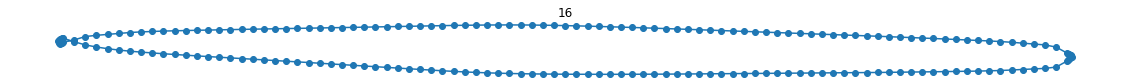

gen=  17
best17=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction17=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


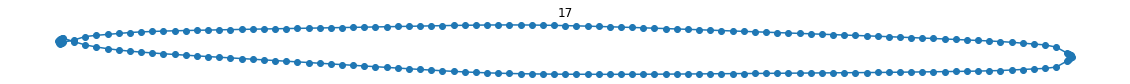

gen=  18
best18=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction18=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


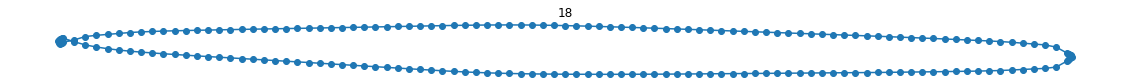

gen=  19
best19=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction19=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


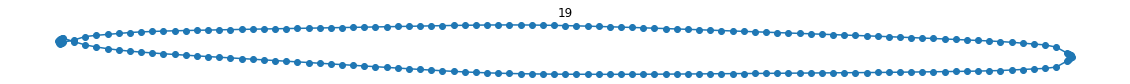

gen=  20
best20=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction20=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


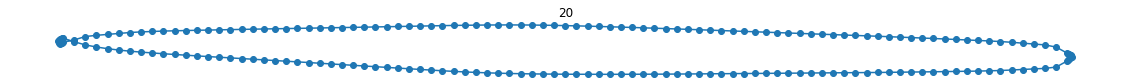

gen=  21
best21=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction21=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


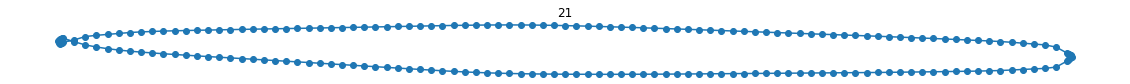

gen=  22
best22=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction22=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


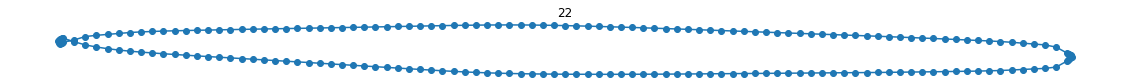

gen=  23
best23=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction23=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


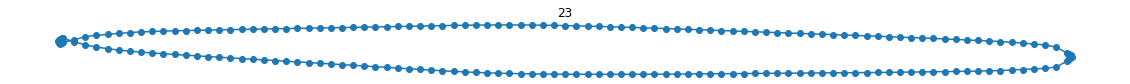

gen=  24
best24=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction24=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


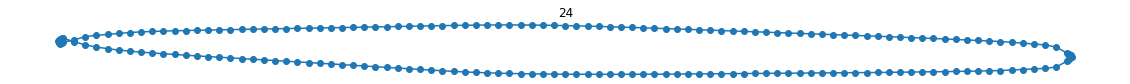

gen=  25
best25=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction25=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


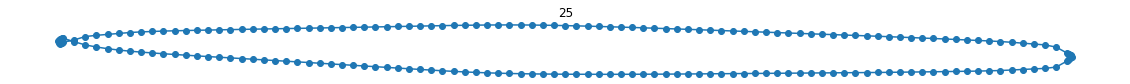

gen=  26
best26=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction26=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


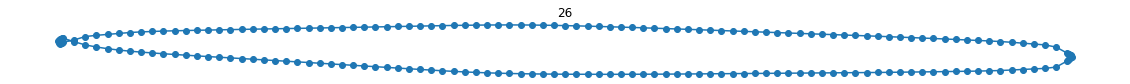

gen=  27
best27=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction27=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


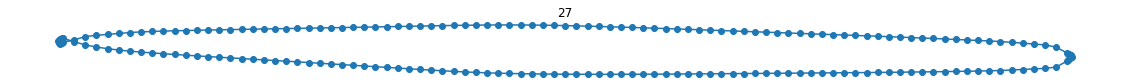

gen=  28
best28=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction28=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


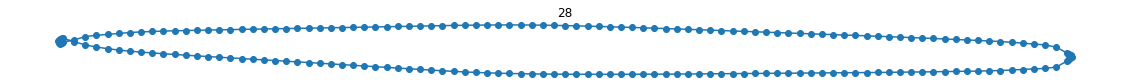

gen=  29
best29=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction29=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


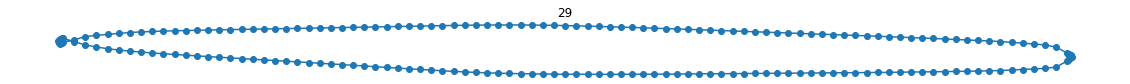

gen=  30
best30=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction30=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


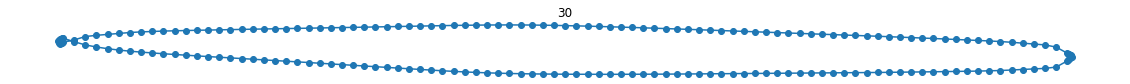

gen=  31
best31=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction31=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


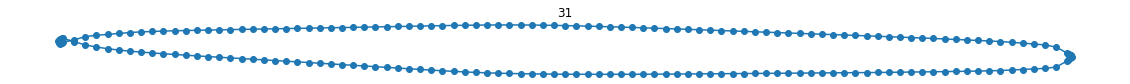

gen=  32
best32=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction32=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


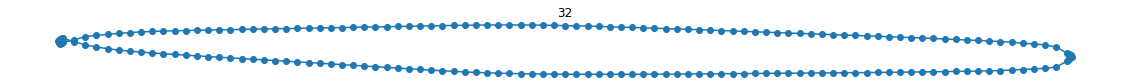

gen=  33
best33=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction33=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


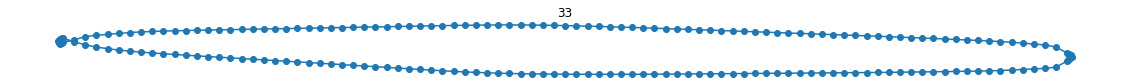

gen=  34
best34=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction34=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


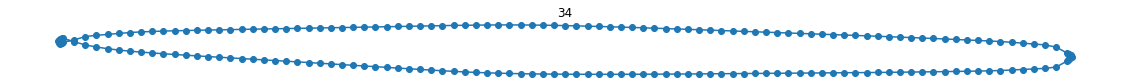

gen=  35
best35=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction35=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


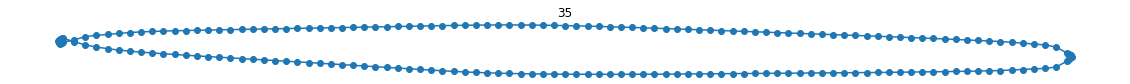

gen=  36
best36=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction36=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


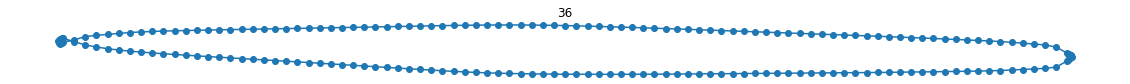

gen=  37
best37=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction37=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


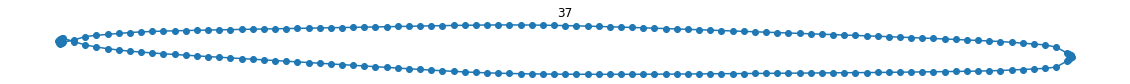

gen=  38
best38=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction38=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


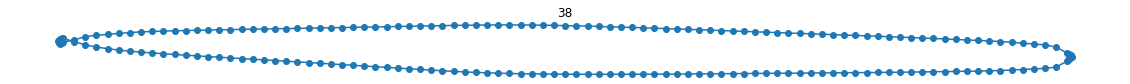

gen=  39
best39=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction39=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


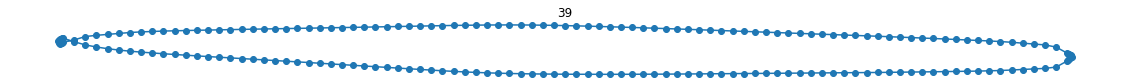

gen=  40
best40=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction40=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


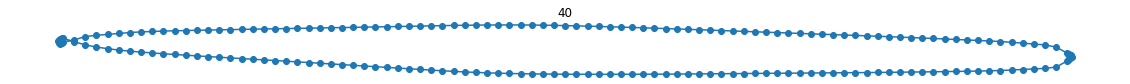

gen=  41
best41=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction41=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


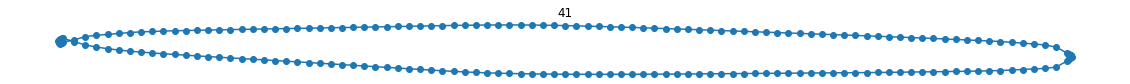

gen=  42
best42=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction42=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


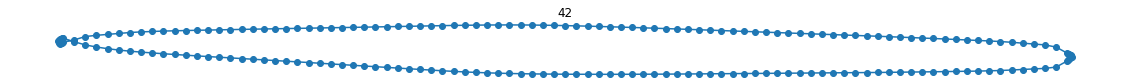

gen=  43
best43=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction43=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


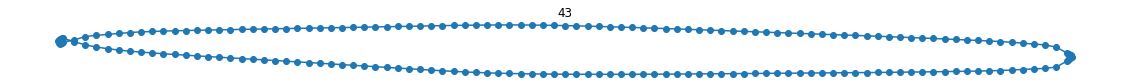

gen=  44
best44=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction44=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


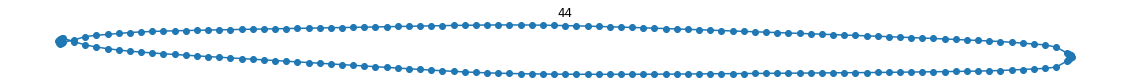

gen=  45
best45=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction45=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


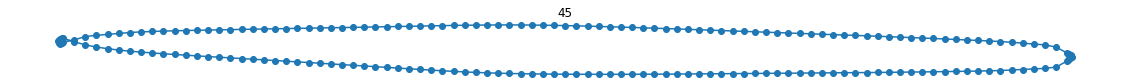

gen=  46
best46=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction46=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


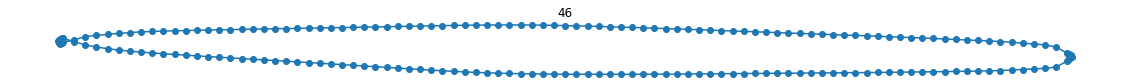

gen=  47
best47=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction47=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


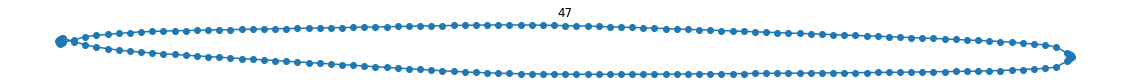

gen=  48
best48=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction48=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


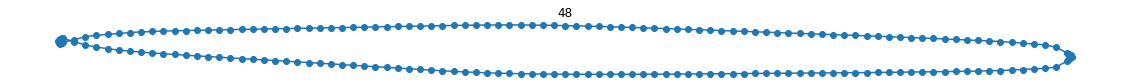

gen=  49
best49=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction49=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


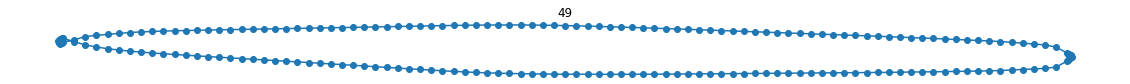

gen=  50
best50=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction50=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


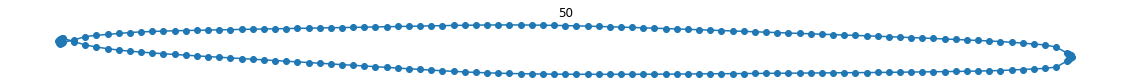

gen=  51
best51=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction51=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


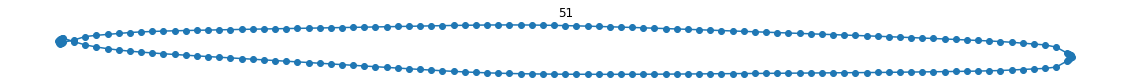

gen=  52
best52=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction52=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


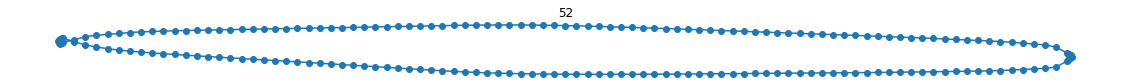

gen=  53
best53=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction53=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


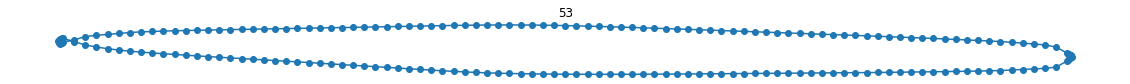

gen=  54
best54=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction54=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


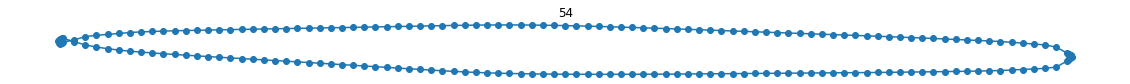

gen=  55
best55=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction55=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


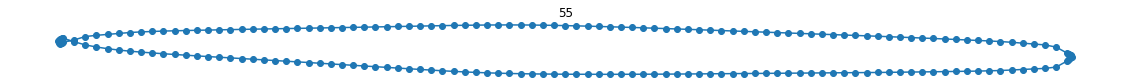

gen=  56
best56=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction56=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


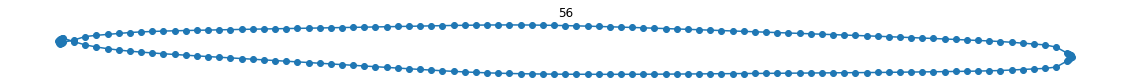

gen=  57
best57=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction57=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


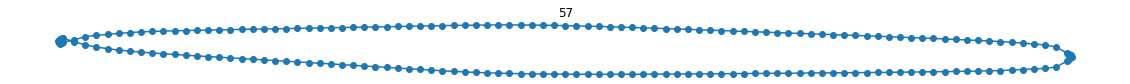

gen=  58
best58=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction58=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


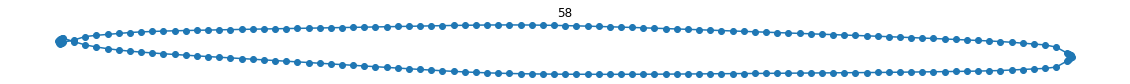

gen=  59
best59=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction59=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


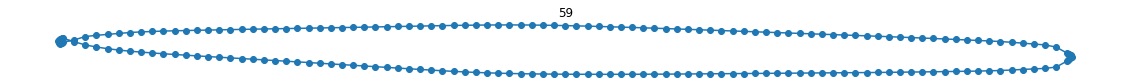

best59=  [[ 1.7646572   0.96798378  2.12618482  0.08722993  1.39243683 -0.04544103
   0.58999425 -0.05489301 -0.10308899  0.20091537]] 
 best_prediction59=  [0.7449831346424234, 156809993.9644718, 0.00043221578750115707]


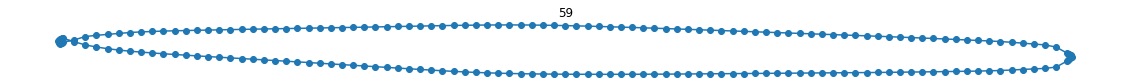

In [ ]:

n_generations=60
n_pop=120
r_cross=0.8
r_mut=0.7
codings_size=10

efficiency_gen=[]
stress_gen=[]
deformation_gen=[]
## Initial population ##
pop= random(n_pop,codings_size)

for n in range(len(pop)):
  pp=np.array(pop[n]).reshape(1,-1)
  initialpop=pca_inverse(pp)
  initialpop=tf.reshape(initialpop,[200])
  m=predictions(decode(pp))
  plot_image(initialpop,n=m)
## keep track of the best solution ##
p=np.array(pop[0]).reshape(1,-1)
best= p
best_efficiency=predictions(decode(best))[0,0]
best_stress= predictions(decode(best))[0,1]
best_deformation= predictions(decode(best))[0,2]
## enumerate generations
for gen in range(n_generations):
  print("gen= ",gen)
  for i in range(n_pop):
    p=np.array(pop[i]).reshape(1,-1)
    decoded=decode(p)
    prediction= predictions(decoded)
    efficiency=prediction[0,0]
    stress=prediction[0,1]
    deformation=prediction[0,2]
## check for new best solution 
    if efficiency >= best_efficiency and stress <= best_stress or deformation <= best_deformation:
      best= p
      best_efficiency= efficiency
      best_stress= stress
      best_deformation= deformation
## select parents 
  parents=list()
  for n in range(n_pop):
    parents.append(selection(pop,0.77,k=5))
## create the next generation 
  children = list()
  for i in range(0, n_pop, 2):
    p1, p2 = parents[i], parents[i+1]
    c1, c2 = np.copy(p1), np.copy(p2)
    p1, p2=np.array(p1), np.array(p2)
    p1, p2=p1.tolist(), p2.tolist()
## Crossover and Mutation
    if rand() < r_cross:
      pt = randint(1, len(p1)-2)
      c1 = p1[:pt] + p2[pt:]
      c2 = p2[:pt] + p1[pt:]
    for c in [c1,c2]:
      c=np.array(c)
      for i in range(len(c)):
        if rand() < r_mut:
          c[i] = 1 - c[i]
      c=c.tolist()
      children.append(c)
## Replace population
  pop = children
  print(f"best{gen}= ",best,"\n" , f"best_prediction{gen}= ",[best_efficiency,best_stress,best_deformation])
  efficiency_gen.append(best_efficiency)
  stress_gen.append(best_stress)
  deformation_gen.append(best_deformation)
  y=pca_inverse(best)
  y=tf.reshape(y,[200])
  n=gen
  plot_image(y,n)

print(f"best{gen}= ",best,"\n" ,f"best_prediction{gen}= ",[best_efficiency,best_stress,best_deformation])
plot_image(y,n)

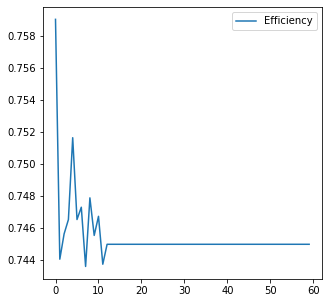

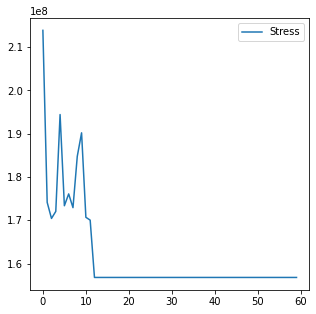

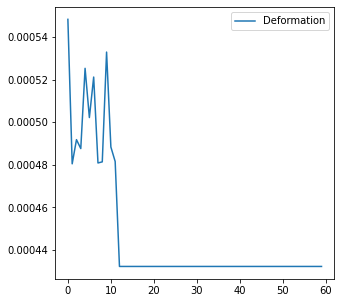

In [ ]:
x_axis=np.arange(n_generations)
plt.figure(figsize=(5,5))
plt.plot(x_axis,efficiency_gen, label="Efficiency")
plt.legend()

plt.figure(figsize=(5,5))
plt.plot(x_axis,stress_gen, label="Stress")
plt.legend()

plt.figure(figsize=(5,5))
plt.plot(x_axis,deformation_gen, label="Deformation")
plt.legend()